In [4]:
#@title NTF last 100 trades
#@markdown Just click the arrow to start

#@markdown Timezone : GMT - 30 minute lag due to the API
# GNU GENERAL PUBLIC LICENSE

# Will show the 100 latest trades on different NFT's
# [CYBΞR BUZZΞ]




import requests
import pandas as pd
from datetime import datetime
import plotly.express as px

CARD = ["0x27665297fab3c72a472f81e6a734ffe81c8c1940a82164aca76476ca2b506724", "CLONE CARD"]
CLONE = ["0x2c4b4edd628bcffffbf4a9d434ce83e4737889b65eee922f00d3c2b2d82b3394", "CYBER CLONE"]
CYCLE = ["0x057047417d4aaf63a083ed0b379d8b8d44f7a9edf6252dced73be6147928eaaf", "CYBER CYCLE"]
CAND = ["0x230d40e35852948fe84d3a4077aefb3c1ae11297b94a55bafc9c8fc1793585ca", "CAN-D"]
items = [CARD,CLONE,CYCLE,CAND]


def get_data(token_id, name, data_list = []):

  URL = "https://api.nft.gamestop.com/nft-svc-marketplace/history?nftData="
  response = requests.get(URL+token_id)
  # response.raise_for_status()
  # access JSOn content
  jsonResponse = response.json()
  for block in jsonResponse:
      for key, value in block.items():
          if key == "createdAt":
              ts = int(value)/1000.0 # Because its a Unix epoch with milliseconds
              # created = datetime.fromtimestamp(ts)
              created = datetime.utcfromtimestamp(ts)

          if key == "transaction":
              for k, v in value.items():
                  if k == "orderB":
                    qty = int(v.get("amountS"))
                    paid = int(v.get("amountB"))/1e18
                    paid = paid/qty
                      
      data_list.append([created,paid,qty, name])
  return data_list

lst = []
for nft in items:
  lst = get_data(nft[0], nft[1])



df = pd.DataFrame(lst, columns =['Time GMT', 'Price ETH', 'Quanty', 'Name']) 
fig = px.line(df, x = "Time GMT", y = "Price ETH", color = 'Name')
fig.show()

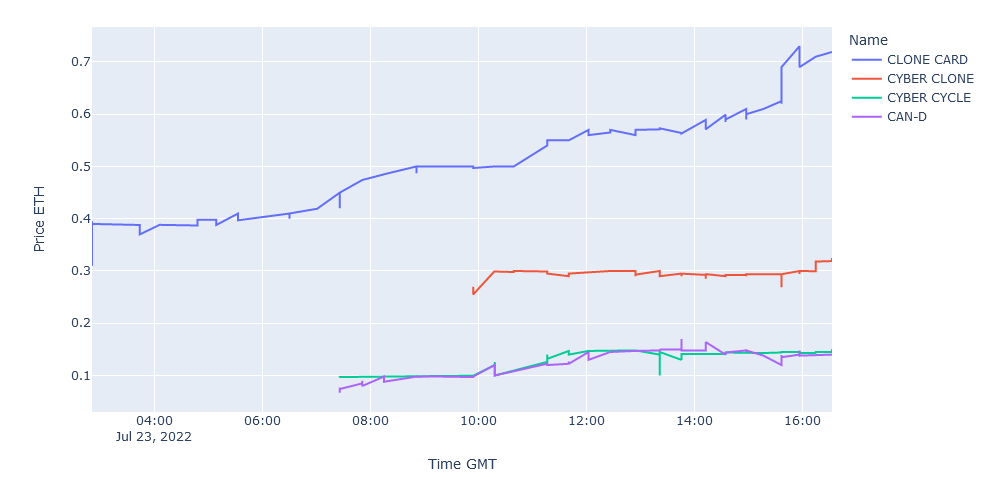